# Melur Erwina binti Mohamad Iskandar

## Research question/interests

**Is being self-sufficient the main core of self-care in leading a thriving life?**

This research question is exploring to find out if physical health is the foundation for a healthy mind. I'm assuming that a person who is able to take care of oneself would have a great self-discipline in navigating life, hence will be better in being productive in daily life. As the concept of healthy body equals to healthy mind, I’m planning to compare factors that constitute to physical health (Sleep_Hours, BMI, Fruit_veggies, Daily_Steps) to healthy mind factors (Todo_complete, Daily_stress).

### Analysis Plan:
1. I would only keep the columns of the factors  I’m interested in (Sleep_Hours, BMI_range, Fruit_veggies, Daily Steps, Todo_complete, Daily_stress) and demographic (Gender) for observation purposes.
1. I will then remove rows that contain Na values to draw a more solid observation and apply the dataframe describe function for an overview of the data.
1. Then, I would observe the distribution of (Fruit_veggies and  Daily_Steps) to (BMI_range) as a measure of healthy body, and distribution of (sleep_hours and BMI_range) to (todo_complete) to see if self-sufficient will drive motivation to accomplish things in life.
1. I will then observe the correlation between (todo_complete and daily_stress) to conclude whether an orderly and productive life would impose less stress and (BMI_range) to (daily_stress) to see if healthy lifestyle will lead to healthy mind.

## Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/raw/Wellbeing_and_lifestyle_data_Kaggle.csv")
df

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3/14/21 5:42,3,3,0,4,0,10,0,4,2,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,3/14/21 6:30,3,3,6,8,7,4,6,3,1,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,3/14/21 8:35,4,3,0,10,10,8,6,5,1,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,3/14/21 8:43,1,1,10,8,2,7,3,2,1,...,8,7,2,2,1,6,8,21 to 35,Female,682.0


## Milestone 3

### Task 1: Conduct an Exploratory Data Analysis (EDA) on your datase

In [3]:
dfa = df[["SLEEP_HOURS", "BMI_RANGE", "FRUITS_VEGGIES", "DAILY_STEPS", "TODO_COMPLETED", "DAILY_STRESS", "GENDER"]]
dfa

,SLEEP_HOURS,BMI_RANGE,FRUITS_VEGGIES,DAILY_STEPS,TODO_COMPLETED,DAILY_STRESS,GENDER
0,7,1,3,5,6,2,Female
1,8,2,2,5,5,3,Female
2,8,2,2,4,2,3,Female
3,5,2,3,5,3,3,Female
4,7,2,5,5,5,1,Female
...,...,...,...,...,...,...,...
15967,7,2,3,10,8,3,Female
15968,6,1,3,6,7,3,Female
15969,7,1,4,5,7,3,Male
15970,8,1,1,1,6,1,Female


In [4]:
dfa.head()

,SLEEP_HOURS,BMI_RANGE,FRUITS_VEGGIES,DAILY_STEPS,TODO_COMPLETED,DAILY_STRESS,GENDER
0,7,1,3,5,6,2,Female
1,8,2,2,5,5,3,Female
2,8,2,2,4,2,3,Female
3,5,2,3,5,3,3,Female
4,7,2,5,5,5,1,Female


In [5]:
dfa.dropna()

,SLEEP_HOURS,BMI_RANGE,FRUITS_VEGGIES,DAILY_STEPS,TODO_COMPLETED,DAILY_STRESS,GENDER
0,7,1,3,5,6,2,Female
1,8,2,2,5,5,3,Female
2,8,2,2,4,2,3,Female
3,5,2,3,5,3,3,Female
4,7,2,5,5,5,1,Female
...,...,...,...,...,...,...,...
15967,7,2,3,10,8,3,Female
15968,6,1,3,6,7,3,Female
15969,7,1,4,5,7,3,Male
15970,8,1,1,1,6,1,Female


### Observation
- No NaN values recorded for the focused columns in the dataframe.

In [6]:
dfa.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
SLEEP_HOURS,15972.0,7.042888,1.199044,1.0,6.0,7.0,8.0,10.0
BMI_RANGE,15972.0,1.410656,0.491968,1.0,1.0,1.0,2.0,2.0
FRUITS_VEGGIES,15972.0,2.922677,1.442694,0.0,2.0,3.0,4.0,5.0
DAILY_STEPS,15972.0,5.703606,2.891013,1.0,3.0,5.0,8.0,10.0
TODO_COMPLETED,15972.0,5.745993,2.624097,0.0,4.0,6.0,8.0,10.0


In [7]:
dfa.describe(exclude='number').T

,count,unique,top,freq
DAILY_STRESS,15972,7,3,4398
GENDER,15972,2,Female,9858


### Observation
- This table shows that there are 7 unique values of Daily Stress variables when in fact there are only 6 levels option of answers.
- This means that there is an unwanted value in the dataframe column.
- Therefore, this value must be recognised and dropped.

In [9]:
dfa["DAILY_STRESS"].unique()

array(['2', '3', '1', '4', '5', '0', '1/1/00'], dtype=object)

In [10]:
dfa.loc[dfa["DAILY_STRESS"]=="1/1/00"]

,SLEEP_HOURS,BMI_RANGE,FRUITS_VEGGIES,DAILY_STEPS,TODO_COMPLETED,DAILY_STRESS,GENDER
10005,6,2,3,6,6,1/1/00,Male


In [11]:
dfa = dfa.drop([10005]).reset_index(drop=True)
dfa

,SLEEP_HOURS,BMI_RANGE,FRUITS_VEGGIES,DAILY_STEPS,TODO_COMPLETED,DAILY_STRESS,GENDER
0,7,1,3,5,6,2,Female
1,8,2,2,5,5,3,Female
2,8,2,2,4,2,3,Female
3,5,2,3,5,3,3,Female
4,7,2,5,5,5,1,Female
...,...,...,...,...,...,...,...
15966,7,2,3,10,8,3,Female
15967,6,1,3,6,7,3,Female
15968,7,1,4,5,7,3,Male
15969,8,1,1,1,6,1,Female


### Observation
- One row is dropped from the dataframe due to an illogical value in Daily Stress column leaving 15971 rows.

In [13]:
dfa.describe(exclude='number').T

,count,unique,top,freq
DAILY_STRESS,15971,6,3,4398
GENDER,15971,2,Female,9858


In [14]:
dfa["DAILY_STRESS"] = pd.to_numeric(dfa["DAILY_STRESS"])

In [15]:
dfa["BMI_RANGE"].astype('category', copy=False)

0        1
1        2
2        2
3        2
4        2
        ..
15966    2
15967    1
15968    1
15969    1
15970    2
Name: BMI_RANGE, Length: 15971, dtype: category
Categories (2, int64): [1, 2]

### Observation
- Change column **BMI_RANGE** and **TODO_COMPLETED** to categorical so the variable can be used as hue when plotting graphs. to be excluded from calulated numerically.

### Data Visualisation

<AxesSubplot: xlabel='DAILY_STEPS', ylabel='FRUITS_VEGGIES'>

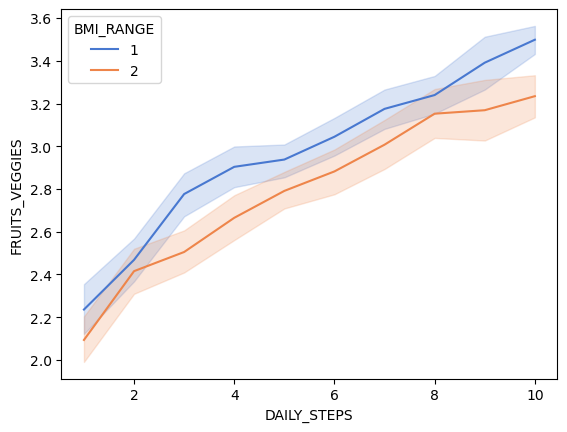

In [16]:
sns.lineplot(x="DAILY_STEPS", y="FRUITS_VEGGIES",
             hue="BMI_RANGE", palette="muted",
             data=dfa)

### Observation
- The line graph shows that at each amount of daily steps, higher intake of fruits and vegetables result in lower BMI range (1; below 25 BMI count)
- This indicates that that fruits and vegetables plays a bigger role than daily steps in contributing to BMI index.

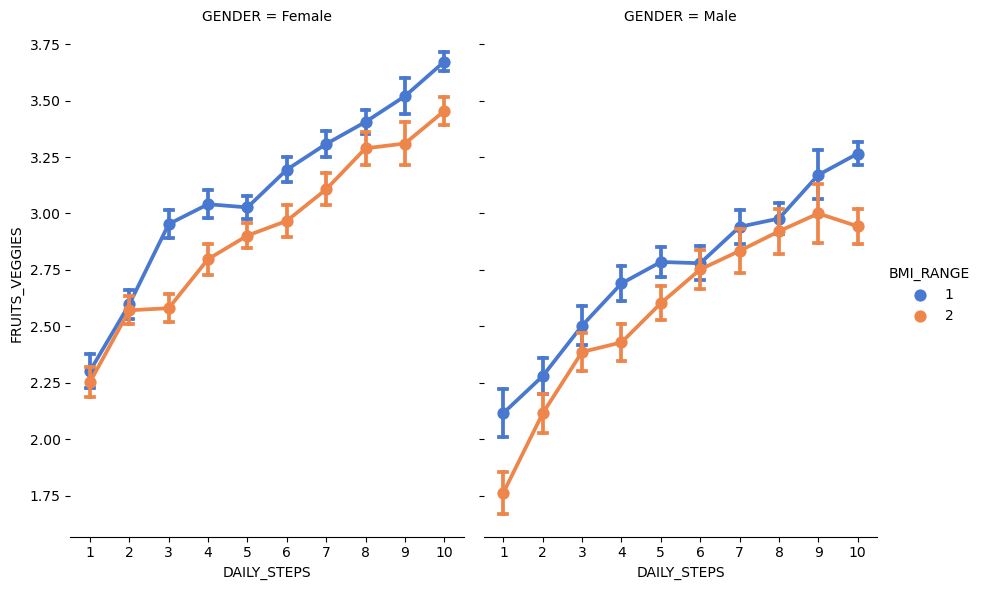

In [17]:
g = sns.catplot(
    data=dfa, x="DAILY_STEPS", y="FRUITS_VEGGIES",
    hue="BMI_RANGE", palette="muted", col="GENDER",
    capsize=.2, errorbar="se",
    kind="point", height=6, aspect=.75,
)
g.despine(left=True)

### Observation
- Demographically. Male eat less fruits and vegetables than female.


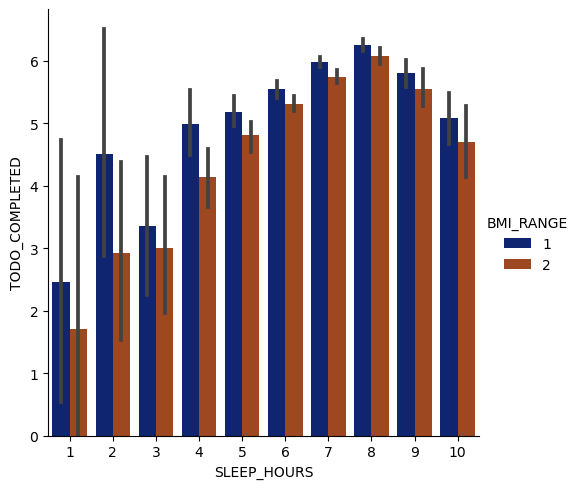

In [18]:
sns.catplot(
    data=dfa, kind="bar",
    x="SLEEP_HOURS", y="TODO_COMPLETED", hue="BMI_RANGE", palette="dark")

### Observation
- Overall, BMI_RANGE level 1 (lower BMI count: not overweight) has higher completed task than BMI_RANGE level 2.
- The completed task increase as sleep hours increases from 1 to 8, then decrease as sleep hours go beyond 8.
- This graph shows that 8 hours of sleep with level 1 of BMI_RANGE has the highest productivity in daily life measured by how well one complete their tasks, followed by level 2 of BMI_RANGE, although not by much difference.
- This indicates that the ability to take care of oneself (optimum hours of sleep and BMI range) determine the level of productivity in daily as driven by self-discipline.

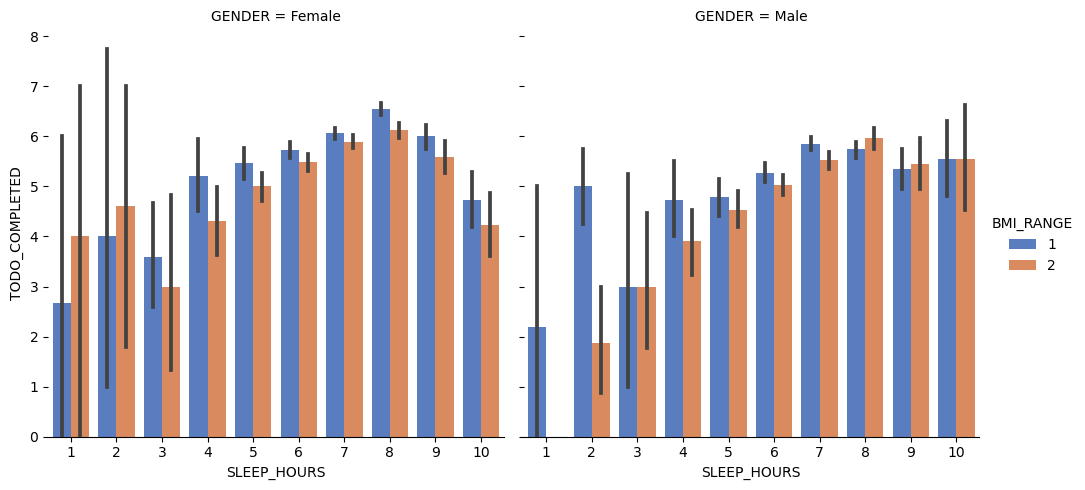

In [19]:
g = sns.catplot(dfa, x="SLEEP_HOURS", y="TODO_COMPLETED", hue="BMI_RANGE",
    palette="muted", col="GENDER", kind="bar"
)
g.despine(left=True)

### Observation
- Completed task peak at 8 hours of sleep for female and at 7 hours of sleep for male.

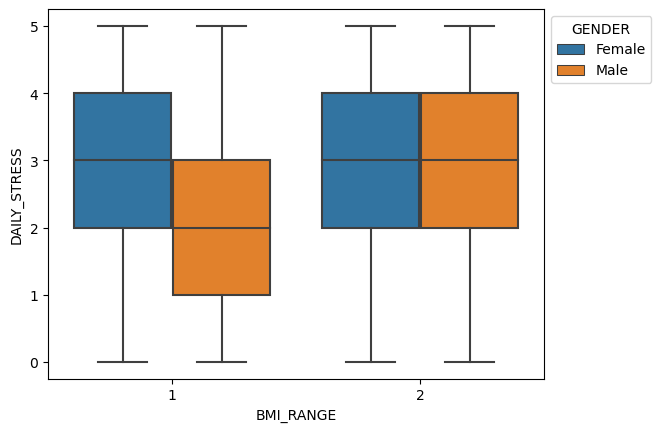

In [29]:
s = sns.boxplot(data=dfa, x="BMI_RANGE", y="DAILY_STRESS", hue="GENDER")
sns.move_legend(s, "upper left", bbox_to_anchor=(1, 1))

### Observation
- The boxplot graph shows that lower BMI count in males result in lower levels of daily stress compared to female.

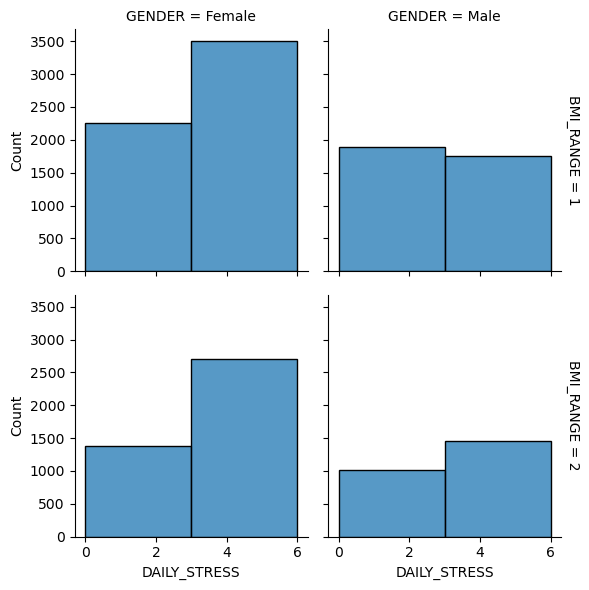

In [21]:
sns.displot(
    dfa, x="DAILY_STRESS", col="GENDER", row="BMI_RANGE",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

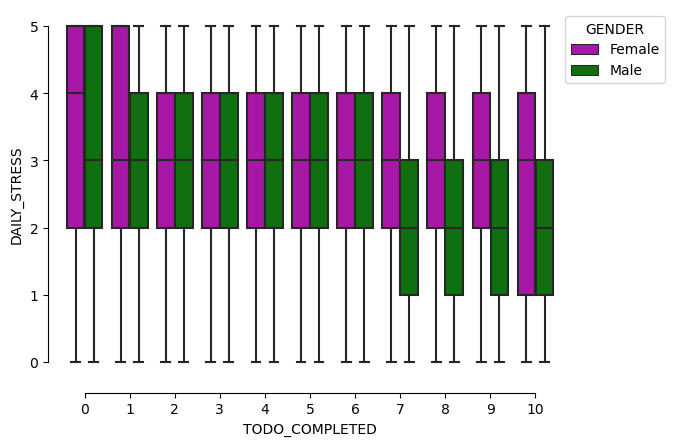

In [22]:
b = sns.boxplot(x="TODO_COMPLETED", y="DAILY_STRESS", hue="GENDER",
           palette=["m", "g"],
            data=dfa)
sns.despine(offset=10, trim=True)
sns.move_legend(b, "upper left", bbox_to_anchor=(1, 1))

### Observation
- The boxplot graph shows that having more completed task result in lower levels of daily stress in males while females shown to retain the stress level regardless of increase in number of completed task.
- Only at the highest number of completed task does females shown a bigger range with lower level of daily stress.

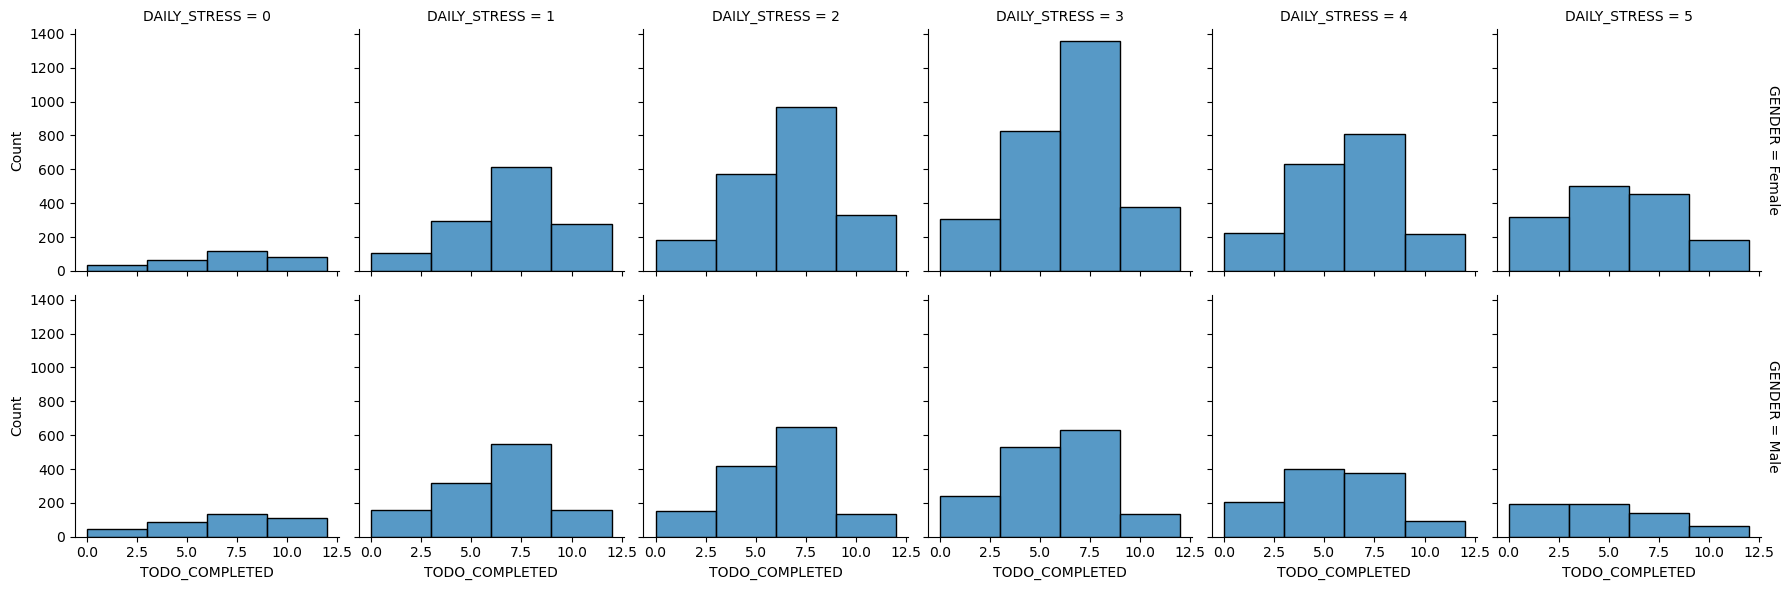

In [23]:
sns.displot(
    dfa, x="TODO_COMPLETED", col="DAILY_STRESS", row="GENDER", kind="hist",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

#### Next Analysis
- More details on dissection of data visualisation